<a href="https://colab.research.google.com/github/rufous86/hh_api/blob/main/hh_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

[**hh api**](https://github.com/hhru/api)

</center>

In [226]:
# ! pip install geopy

In [1]:
import requests
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import plotly.express as px

In [11]:
res = []
def get_vacancy(vacancies, pages=100):
    for vacancy in tqdm(vacancies):
        print(f'collecting <{vacancy}>')
        for page in tqdm(range(pages)):
            params = {
                'text': f'{vacancy}',
                'page': page,
                'per_page': 100,
                'currency': 'RUR',
                'only_with_salary': 'true',
                }
            req = requests.get('https://api.hh.ru/vacancies', params).json()
            if 'items' in req.keys():
                res.extend(req['items'])

vacancies = ['maching AND learning', 'data AND science', 'sql', 'NLP',
             'spark', 'hadoop', 'pandas', 'dask', 'deep AND learning', 'pytorch',
             'tensorflow', 'keras', 'ai AND developer', 'computer AND vision',
            'нейронные AND сети', 'big AND data']
get_vacancy(vacancies)

data = pd.DataFrame(res)
data.shape

  0%|          | 0/16 [00:00<?, ?it/s]

collecting <maching AND learning>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <data AND science>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <sql>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <NLP>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <spark>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <hadoop>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <pandas>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <dask>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <deep AND learning>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <pytorch>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <tensorflow>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <keras>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <ai AND developer>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <computer AND vision>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <нейронные AND сети>


  0%|          | 0/100 [00:00<?, ?it/s]

collecting <big AND data>


  0%|          | 0/100 [00:00<?, ?it/s]

(3247, 29)

In [44]:
df = data.copy()
columns = ['name', 'salary', 'schedule', 'accept_temporary', 'area', 'published_at']
df = df[columns]
df.head()

,name,salary,schedule,accept_temporary,area,published_at
0,Senior Machine Learning Engineer,"{'from': 4000, 'to': 5800, 'currency': 'EUR', ...","{'id': 'fullDay', 'name': 'Полный день'}",True,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2022-12-24T01:29:25+0300
1,Senior Software Engineer C++,"{'from': 5000, 'to': 10000, 'currency': 'USD',...","{'id': 'remote', 'name': 'Удаленная работа'}",False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2022-12-22T12:50:04+0300
2,Data Engineer,"{'from': None, 'to': 5000, 'currency': 'USD', ...","{'id': 'fullDay', 'name': 'Полный день'}",True,"{'id': '13', 'name': 'Армения', 'url': 'https:...",2022-12-22T12:13:48+0300
3,Machine learning engineer/ разработчик машинно...,"{'from': 200000, 'to': 400000, 'currency': 'RU...","{'id': 'remote', 'name': 'Удаленная работа'}",False,"{'id': '72', 'name': 'Пермь', 'url': 'https://...",2022-12-19T13:22:24+0300
4,Аналитик Data Science (консультант),"{'from': 15, 'to': 20, 'currency': 'USD', 'gro...","{'id': 'remote', 'name': 'Удаленная работа'}",False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",2022-12-23T09:18:27+0300


In [45]:
df["city"] = (df["area"]
                     .apply(lambda x: x.get("name") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["schedule"] = (df["schedule"]
                     .apply(lambda x: x.get("id") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["salary_from"] = (df["salary"]
                     .apply(lambda x: x.get("from") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["salary_to"] = (df["salary"]
                     .apply(lambda x: x.get("to") 
                                      if isinstance(x, dict) 
                                      else np.nan))
df["salary_currency"] = (df["salary"]
                     .apply(lambda x: x.get("currency") 
                                      if isinstance(x, dict) 
                                      else np.nan))

df = df.drop(['salary', 'area'], axis=1)
df.head()

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to,salary_currency
0,Senior Machine Learning Engineer,fullDay,True,2022-12-24T01:29:25+0300,Москва,4000.0,5800.0,EUR
1,Senior Software Engineer C++,remote,False,2022-12-22T12:50:04+0300,Москва,5000.0,10000.0,USD
2,Data Engineer,fullDay,True,2022-12-22T12:13:48+0300,Армения,NaN,5000.0,USD
3,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19T13:22:24+0300,Пермь,200000.0,400000.0,RUR
4,Аналитик Data Science (консультант),remote,False,2022-12-23T09:18:27+0300,Москва,15.0,20.0,USD


In [47]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()

In [65]:
def currency_converter(salary, salary_currency):
    return c.convert(salary, salary_currency, 'RUB')

# currency_converter(100, 'RUB')
1 / c.convert(1, 'RUB', 'EUR')

117.20100000000001

In [15]:
df = df[df['salary_currency'] == 'RUR']

In [16]:
df = df.drop_duplicates()

In [17]:
df['salary_currency'].value_counts()

RUR    2550
Name: salary_currency, dtype: int64

In [18]:
df['salary_from'] = df['salary_from'].fillna(df['salary_to'])
df['salary_to'] = df['salary_to'].fillna(df['salary_from'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 3 to 3246
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2550 non-null   object 
 1   schedule          2550 non-null   object 
 2   accept_temporary  2550 non-null   bool   
 3   published_at      2550 non-null   object 
 4   city              2550 non-null   object 
 5   salary_from       2550 non-null   float64
 6   salary_to         2550 non-null   float64
 7   salary_currency   2550 non-null   object 
dtypes: bool(1), float64(2), object(5)
memory usage: 161.9+ KB


In [20]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geo")

def get_coords(city):
    geo = geolocator.geocode(city)
    if geo:
        return geo.longitude, geo.latitude
    else:
        return np.nan, np.nan


coords = pd.DataFrame(data=df['city'].unique(), columns=['city'])
coords['(lon, lat)'] = (coords['city']
                        .apply(lambda x: get_coords(x)))


coords['lon'] = (coords['(lon, lat)']
                        .apply(lambda x: x[0]))
coords['lat'] = (coords['(lon, lat)']
                        .apply(lambda x: x[1]))
coords = coords.drop('(lon, lat)', axis=1)

In [21]:
total_vac = dict(df
            .groupby('city')['name']
            .agg('count')
            )

In [22]:
df = df.merge(coords, on='city')
df['salary_mean'] = (df['salary_from'] + df['salary_to']) / 2
df['total_vac'] = (df['city']
                .apply(lambda x: total_vac[x]))
df.head()

,name,schedule,accept_temporary,published_at,city,salary_from,salary_to,salary_currency,lon,lat,salary_mean,total_vac
0,Machine learning engineer/ разработчик машинно...,remote,False,2022-12-19T13:22:24+0300,Пермь,200000.0,400000.0,RUR,56.230767,58.021487,300000.0,36
1,Программист (компьютерное зрение / OpenCV),fullDay,False,2022-12-22T11:05:36+0300,Пермь,100000.0,250000.0,RUR,56.230767,58.021487,175000.0,36
2,DWH специалист / аналитик баз данных (Удалённа...,fullDay,False,2022-12-22T15:37:13+0300,Пермь,100000.0,100000.0,RUR,56.230767,58.021487,100000.0,36
3,Системный аналитик IT,remote,True,2022-12-21T08:44:07+0300,Пермь,80000.0,150000.0,RUR,56.230767,58.021487,115000.0,36
4,Product analyst / Продуктовый аналитик (удаленно),remote,False,2022-12-13T13:49:08+0300,Пермь,130000.0,180000.0,RUR,56.230767,58.021487,155000.0,36


In [25]:
df['published_at'] = pd.to_datetime(df['published_at']).dt.date

In [26]:
df_grouped = (df
     .groupby('city')[['salary_mean', 'lon', 'lat', 'total_vac', 'published_at']]
     .agg('mean')
                         )

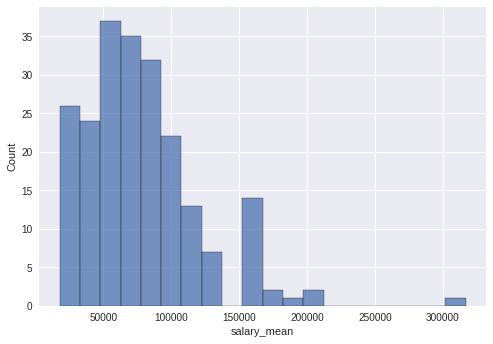

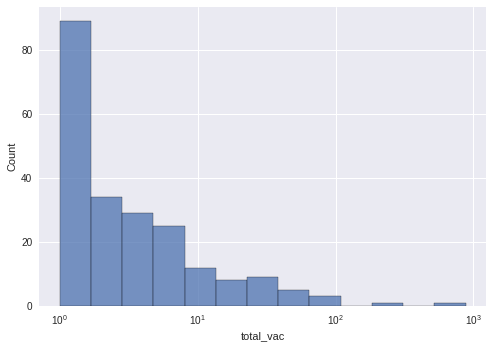

In [42]:
sns.histplot(data=df_grouped, x='salary_mean')
plt.show()
sns.histplot(data=df_grouped, x='total_vac', log_scale=True)
plt.show()

In [28]:
df_grouped['city'] = df_grouped.index

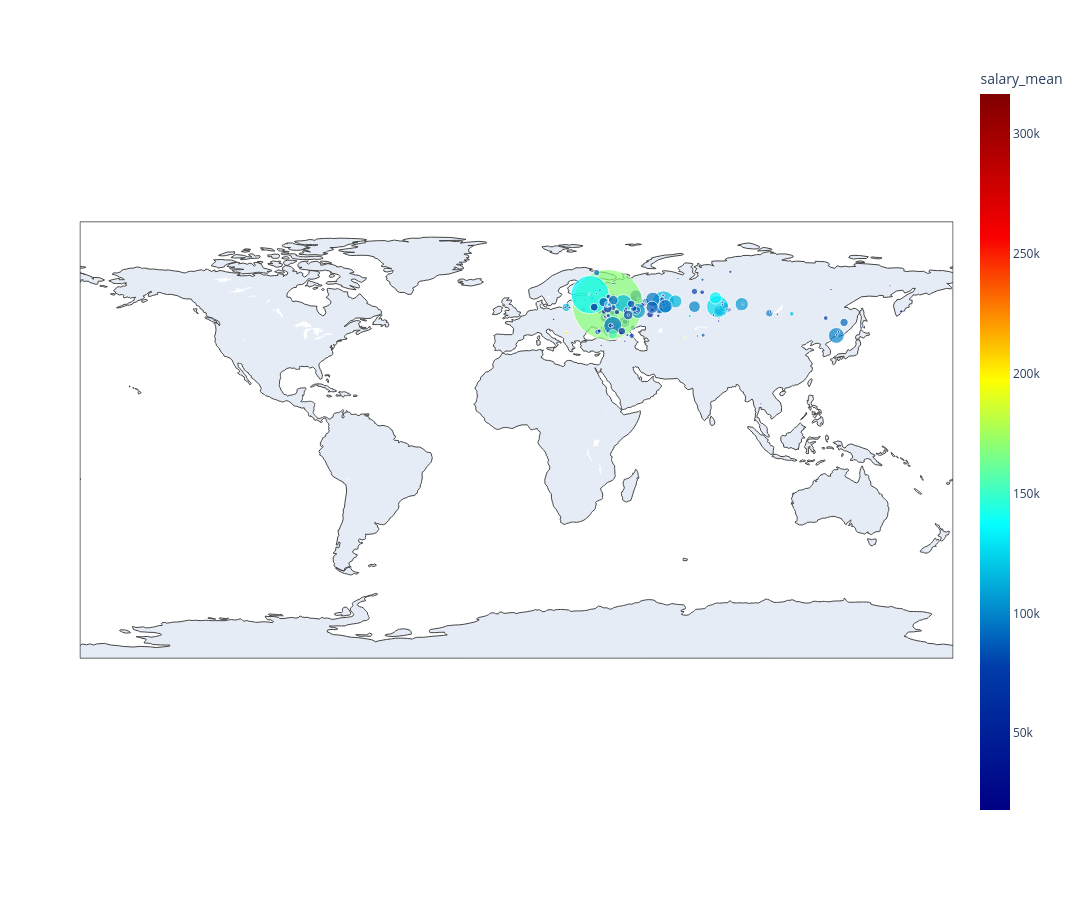

In [31]:
fig = px.scatter_geo(df_grouped, lat='lat', lon='lon', 
                     color='salary_mean', hover_name='city',
                     color_continuous_scale=px.colors.sequential.Jet, 
                     size='total_vac', size_max=50, width=1000, height=900)
fig.show()

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df_grouped[['total_vac', 'salary_mean']]
scaler = StandardScaler().fit_transform(X)
clustering = KMeans(3).fit(scaler)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

In [36]:
df_grouped['cluster'] = clustering.labels_
df_grouped['city+salary_mean'] = df_grouped['city'] + ' ' + df_grouped['salary_mean'].astype('str') + ' руб.'

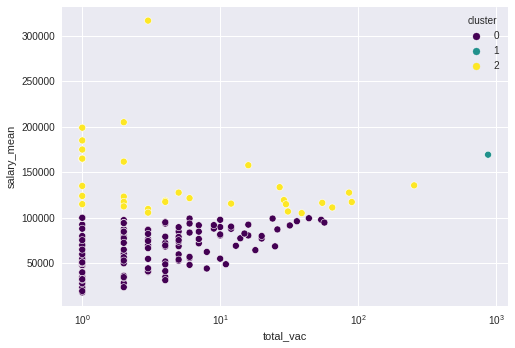

In [37]:
sns.scatterplot(data=df_grouped, x='total_vac', y='salary_mean', hue='cluster', palette='viridis')
plt.xscale('log')
plt.show()

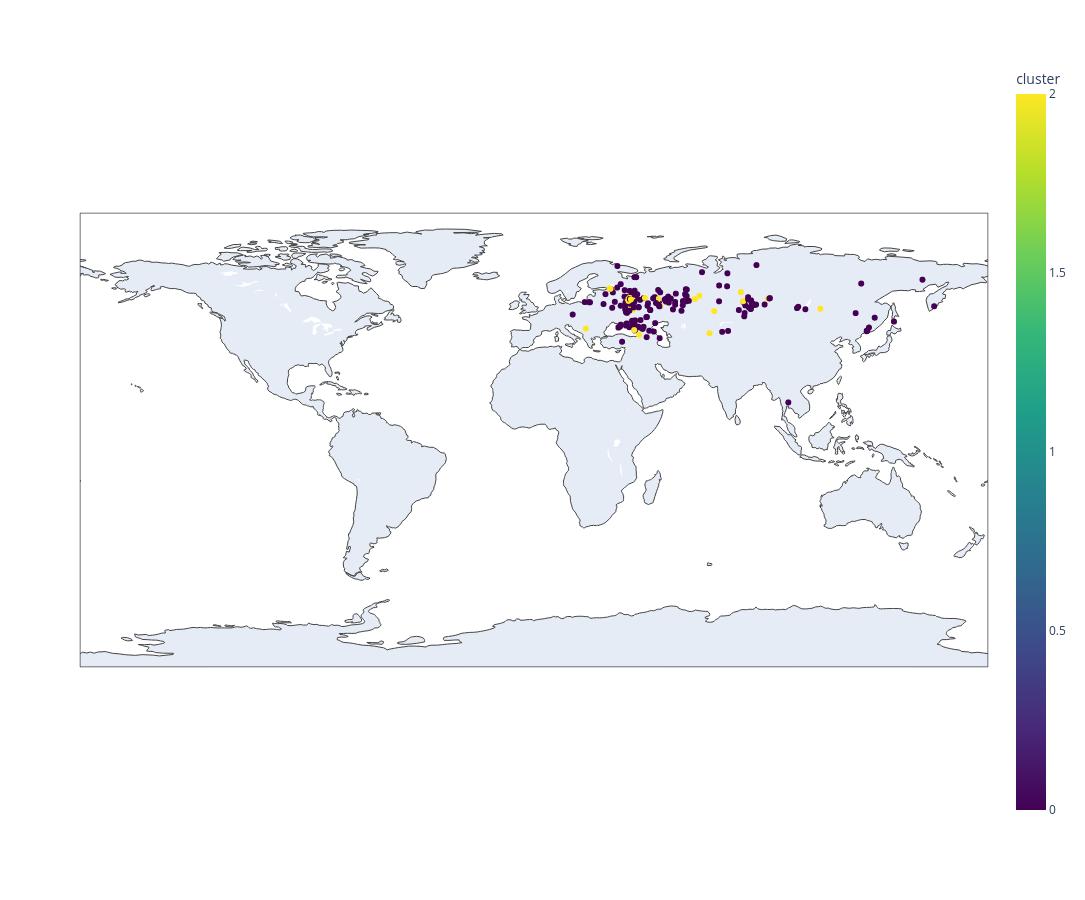

In [40]:
fig = px.scatter_geo(df_grouped, lat='lat', lon='lon', 
                     color='cluster',  hover_name='city+salary_mean',
                     color_continuous_scale=px.colors.sequential.Viridis,
                     size_max=40, width=1000, height=900)
fig.show()

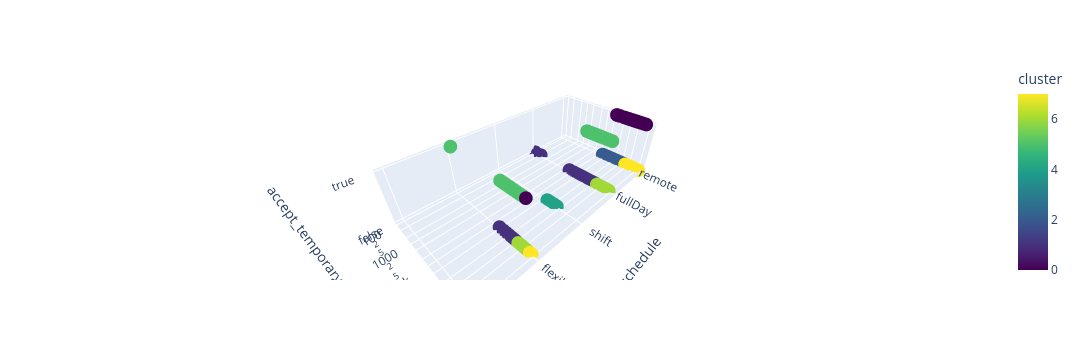

In [43]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

X = df[['accept_temporary', 'salary_mean', 'schedule']]
X = pd.get_dummies(X, 
                    columns=['accept_temporary', 'schedule'], 
                    drop_first=True)
scaler = StandardScaler().fit_transform(X)
clustering = KMeans().fit(scaler)
df['cluster'] = clustering.labels_

fig = px.scatter_3d(df, x='schedule', y='salary_mean', z='accept_temporary',
              color='cluster', log_y=True,
              color_continuous_scale=px.colors.sequential.Viridis)
fig.show()